In [1]:
import talib
from matplotlib import pyplot as plt
from exchange.board import *
from matplotlib import pyplot as plt

In [2]:
root_path = '../DATA/BB/10/'

files = ('BB-2020-10-01T00-09-41.084127Z.log.gz',
    'BB-2020-10-01T01-00-58.670877Z.log.gz',
    'BB-2020-10-01T01-53-02.064144Z.log.gz',
    'BB-2020-10-01T02-44-49.406307Z.log.gz',
    'BB-2020-10-01T03-36-14.186767Z.log.gz',
    'BB-2020-10-01T04-27-59.817297Z.log.gz',
    'BB-2020-10-01T05-19-36.804052Z.log.gz',
    'BB-2020-10-01T06-11-06.849645Z.log.gz',
    'BB-2020-10-01T07-02-24.289180Z.log.gz',
    'BB-2020-10-01T07-54-13.840578Z.log.gz',
    'BB-2020-10-01T08-45-42.229831Z.log.gz',
    'BB-2020-10-01T09-37-01.732325Z.log.gz',
    'BB-2020-10-01T10-28-16.647548Z.log.gz')

In [3]:
history = load_files([root_path+files[0], root_path+files[1], root_path+files[2]])
print(len(history.dollar_bar))

history.dollar_bar

chop too short 2020-10-01 01:03:42.258000 2020-10-01 01:15:42.258000
chop too short 2020-10-01 02:24:19.906000 2020-10-01 02:36:19.906000
chop too short 2020-10-01 02:41:23.878000 2020-10-01 02:53:23.878000
64


,time_stamp,open,close,high,low,sell_volume,buy_volume,bs_ratio,market_buy,market_sell,limit_buy,limit_sell,q_market_buy,q_market_sell,q_limit_buy,q_limit_sell
time,,,,,,,,,,,,,,,,
0,2020-10-01 00:12:58.047,10796.0,10792.5,10796.0,10792.0,3.155,1.300,0.291807,10792.5,10792.0,NaN,NaN,3.0,6.0,NaN,NaN
1,2020-10-01 00:15:25.225,10792.0,10796.0,10796.0,10792.0,2.200,3.383,0.605947,10796.0,10795.5,NaN,NaN,-4.0,9.5,NaN,NaN
2,2020-10-01 00:17:46.406,10796.0,10791.5,10798.5,10791.5,3.308,1.648,0.332526,10792.0,10791.5,NaN,10792.0,3.0,5.5,NaN,6.0
3,2020-10-01 00:18:24.453,10791.5,10785.5,10791.5,10785.5,4.720,0.000,0.000000,10786.0,10785.5,NaN,NaN,9.0,-3.5,NaN,NaN
4,2020-10-01 00:22:37.969,10785.5,10789.5,10789.5,10785.5,3.380,1.855,0.354346,10789.5,10789.0,10789.0,NaN,5.5,-6.0,6.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,2020-10-01 02:23:23.764,10808.5,10808.0,10808.5,10808.0,2.773,1.608,0.367039,10808.5,10808.0,NaN,NaN,-0.5,-0.5,NaN,NaN
60,2020-10-01 02:23:23.764,10808.0,10808.0,10808.0,10808.0,5.287,0.000,0.000000,10808.5,10808.0,NaN,NaN,-0.5,-0.5,NaN,NaN
61,2020-10-01 02:24:19.906,10808.0,10808.0,10808.0,10808.0,5.288,0.000,0.000000,10808.5,10808.0,NaN,NaN,NaN,NaN,NaN,NaN


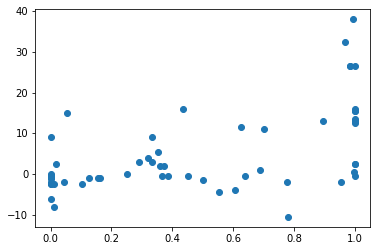

In [5]:
df = history.dollar_bar
plt.scatter(df['bs_ratio'], df['q_market_buy'])

In [9]:
from minepy import MINE

m = MINE()
m.compute_score(df['bs_ratio'], df['q_market_buy'])
print(m.mic())


0.43689187524808065


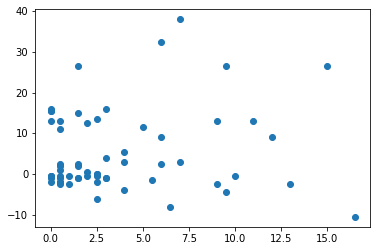

0.2724127051599248

In [11]:
plt.scatter(df['high']-df['low'], df['q_market_buy'])
plt.show()

m.compute_score(df['high']-df['low'], df['q_market_buy'])
m.mic()


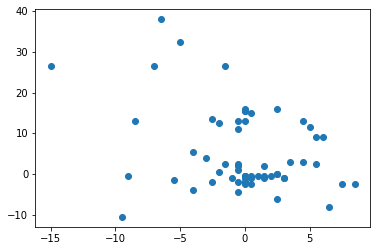

In [12]:
plt.scatter(df['open']-df['close'], df['q_market_buy'])
plt.show()

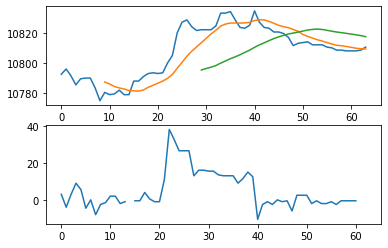

0.39497429867366385


In [25]:
import talib
from matplotlib import pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

close = df['close'].copy()

sma10 = talib.SMA(close, timeperiod=10)
sma30 = talib.SMA(close, timeperiod=30)

ax1.plot(close)
ax1.plot(sma10)
ax1.plot(sma30)
ax2.plot(df['q_market_buy'])
plt.show()

m.compute_score(sma10, df['q_market_buy'])
print(m.mic())



In [16]:
m.compute_score(sma30, df['q_market_buy'])
print(m.mic())

0.5592762840553555


In [ ]:
plt.hist(close, bins=50)
plt.show()